# Geodatenanalyse 1


## Termin 11

## Einführung in die Kartografie mit Python

In [2]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## Übung 1

In dieser Übung geht es um die Erstellung von einfachen Karten:

**Aufgabe 1**: Bilde Deutschland auf einer Karte ab. Verwende dazu die UTM Projektion (Zone 32). Bitte auch die Grenze einzeichnen.

**Aufgabe 2**: Zeichne deinen Wohnort als roten Punkt auf diese Karte. Achtung: Die Koordinaten müssen über das Schlüsselwort *transform* richtig transformiert werden!

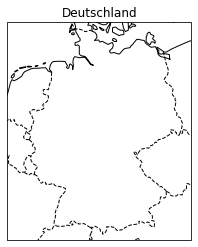

In [5]:
# Aufgabe 1

# eine Achse erstellen und die Projektion laden
ax = plt.axes(projection=ccrs.UTM(zone=32))

ax.coastlines(resolution='50m')

border = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_0_boundary_lines_land', scale='50m', facecolor='none')
ax.add_feature(border, linestyle='--', edgecolor='k', alpha=1)

# den Ausschnitt festlegen
ax.set_extent([5, 15, 47, 55])

ax.set_title('Deutschland')

plt.show()

(49.0089535, 8.4167059)


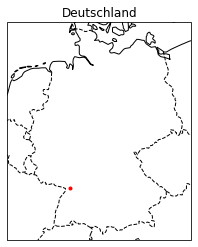

In [6]:
# Aufgabe 2

# eine Achse erstellen und die Projektion laden
ax = plt.axes(projection=ccrs.UTM(zone=32))

ax.coastlines(resolution='50m')

border = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_0_boundary_lines_land', scale='50m', facecolor='none', alpha=0.7)
ax.add_feature(border, linestyle='--', edgecolor='k', alpha=1)

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Example")
location = geolocator.geocode("Kaiserstrasse 20, 76131 Karlsruhe")
print(location[1])

ax.plot(location[1][1], location[1][0], markersize=3, marker='o', color='red', transform=ccrs.Geodetic())

# den Ausschnitt festlegen
ax.set_extent([5, 15, 47, 55])

ax.set_title('Deutschland')

plt.show()

## Übung 2

In dieser Übung geht es um den Größenvergleich zweier Länder:

**Aufgabe 1**: Bilde Australien auf einer Karte ab.

**Aufgabe 2**: Bilde Kanada und Australien so ab, dass sie übereinander liegen. Nütze dafür die eingebauten Objekte in *cartopy* und das WGS84 Koordinatensystem. Welches Land ist flächenmäßig größer? Ist dieser Vergleich so richtig?

**Aufgabe 3**: Transformiere beide Länder in eine flächengleiche Projektion (z.B. *Mollweide*). Bilde beide Länder in einer Grafik ab. Vergleiche die Abbildung mit der von Aufgabe 1.


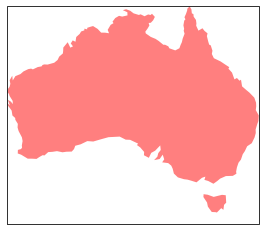

In [7]:
# Aufgabe 1

import shapely
import cartopy
import pyproj

ax = plt.axes(projection=ccrs.PlateCarree())

shpfilename = cartopy.io.shapereader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = cartopy.io.shapereader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    if country.attributes['SOVEREIGNT'] == "Australia":
        australia = country.geometry

hau = ax.add_geometries([australia], ccrs.PlateCarree(), facecolor='r', alpha=0.5)

ax.set_extent([australia.bounds[0], australia.bounds[2], australia.bounds[1], australia.bounds[3]])

plt.show()

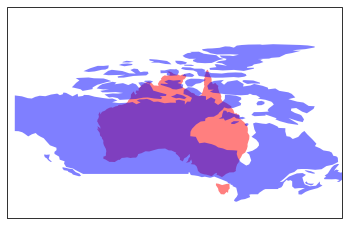

In [27]:
# Aufgabe 2

import shapely
import cartopy
import pyproj

ax = plt.axes(projection=ccrs.PlateCarree())

shpfilename = cartopy.io.shapereader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = cartopy.io.shapereader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    # print(country.attributes['SOVEREIGNT'])
    if country.attributes['SOVEREIGNT'] == "Canada":
        canada = country.geometry
    if country.attributes['SOVEREIGNT'] == "Australia":
        australia = country.geometry

# centering on 0,0 is simply moving the geometry by MINUS its x/y
dx = -australia.centroid.x
dy = -australia.centroid.y
australia_1 = shapely.affinity.translate(australia, dx, dy)

dx = -canada.centroid.x
dy = -canada.centroid.y
canada_1 = shapely.affinity.translate(canada, dx, dy)

hau = ax.add_geometries([australia_1], ccrs.PlateCarree(), facecolor='r', alpha=0.5)
hcad = ax.add_geometries([canada_1], ccrs.PlateCarree(), facecolor='b', alpha=0.5)

ax.set_extent([canada_1.bounds[0]-2, canada_1.bounds[2]-2, canada_1.bounds[1]+2, canada_1.bounds[3]+2])

plt.show()

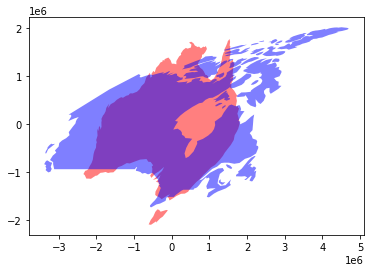

In [28]:
# Aufgabe 3
import cartopy
import shapely
import pyproj
import shapely
from shapely.ops import transform

shpfilename = cartopy.io.shapereader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = cartopy.io.shapereader.Reader(shpfilename)
countries = reader.records()

for country in countries:       
    # print(country.attributes['SOVEREIGNT'])
    if country.attributes['SOVEREIGNT'] == "Canada":
        canada = country.geometry
    if country.attributes['SOVEREIGNT'] == "Australia":
        australia = country.geometry

# Koordinatentransformation
project = pyproj.Transformer.from_crs('WGS84', 'World_Mollweide', always_xy=True)

# g1 is a shapley Polygon
canada_rob = shapely.ops.transform(project.transform, canada) 
australia_rob = shapely.ops.transform(project.transform, australia)
#print(canada_rob)

# centering on 0,0 is simply moving the geometry by MINUS its x/y
dx = -australia_rob.centroid.x
dy = -australia_rob.centroid.y
australia_rob_1 = shapely.affinity.translate(australia_rob, dx, dy)

for geom in australia_rob_1.geoms:
    xs, ys = geom.exterior.xy
    plt.fill(xs, ys, alpha=0.5, fc='r', ec='none')
    
dx = -canada_rob.centroid.x
dy = -canada_rob.centroid.y
canada_rob_1 = shapely.affinity.translate(canada_rob, dx, dy)

for geom in canada_rob_1.geoms:
    xs, ys = geom.exterior.xy
    plt.fill(xs, ys, alpha=0.5, fc='b', ec='none')

plt.show()

## ENDE